# 03. 통계(with타이타닉호 데이터)

### 모듈 import

In [2]:
from IPython.display import Image
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

### 데이터셋 로드

In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


컬럼(columns) 설명

- survivied: 생존여부 (1: 생존, 0: 사망)

- pclass: 좌석 등급 (1등급, 2등급, 3등급)

- sex: 성별

- age: 나이


- sibsp: 형제 + 배우자 수

- parch: 부모 + 자녀 수

- fare: 좌석 요금

- embarked: 탑승 항구 (S, C, Q)

- class: pclass와 동일

- who: 남자(man), 여자(woman), 아이(child)

- adult_male: 성인 남자 여부

- deck: 데크 번호 (알파벳 + 숫자 혼용)

- embark_town: 탑승 항구 이름

- alive: 생존여부 (yes, no)

- alone: 혼자 탑승 여부

통계는 데이터 분석에서 굉장히 중요한 요소입니다.

데이터에 대한 통계 계산식을 Pandas 함수로 제공하기 때문에 어렵지 않게 통계 값을 산출할 수 있습니다.

이번 장에서는 타이타닉호 승객 데이터를 활용해 통계에 대해 알아보도록 합니다.

### describe() - 요약통계

전반적인 주요 통계를 확인할 수 있습니다.

기본 값으로 수치형(Numerical) 컬럼에 대한 통계표를 보여줍니다.

- count: 데이터 개수

- mean: 평균

- std: 표준편차

- min: 최솟값

- max: 최대값

In [ ]:
df.describe() # 수치형 컬럼

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


문자열 컬럼에 대한 통계표도 확인할 수 있습니다.

- count: 데이터 개수

- unique: 고유 데이터의 값 개수

- top: 가장 많이 출현한 데이터 개수

- freq: 가장 많이 출현한 데이터의 빈도수

In [ ]:
df.describe(include='object') # 문자열 컬럼

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


---

### count() - 개수

데이터의 개수

DataFrame 전체의 개수를 구하는 경우

In [7]:
df.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

단일 column의 데이터 개수를 구하는 경우

In [12]:
df['age'].count()

np.int64(714)

### mean() - 평균

데이터의 평균

DataFrame 평균

In [13]:
df.mean(numeric_only=True)

survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

age 컬럼에 대한 평균

In [14]:
df['age'].mean()

np.float64(29.69911764705882)

### Mean - 조건별 평균

성인 남성의 나이의 평균 구하기

In [15]:
condition = (df['adult_male'] == True)
df.loc[condition, 'age'].mean()

np.float64(33.17312348668281)

### skipna=True 옵션

기술 통계 함수에서는 skipna=True가 기본으로 설정 되어 있습니다.

만약, skipna=False로 설정하게 된다면, NaN 값이 있는 column은 NaN 값으로 출력 됩니다.

In [17]:
# skipna=False를 지정한 경우
df.mean(numeric_only=True, skipna=False)

survived       0.383838
pclass         2.308642
age                 NaN
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

In [19]:
# skipna=True를 지정한 경우
df.mean(numeric_only=True, skipna=True)

survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

### median() - 중앙값

데이터의 중앙 값을 출력 합니다. 데이터를 오름차순 정렬하여 중앙에 위치한 값입니다.

이상치(outlier)가 존재하는 경우, mean()보다 median()을 대표값으로 더 선호합니다.

In [20]:
pd.Series([1, 2, 3, 4, 5]).median()

3.0

In [21]:
pd.Series([4, 5, 1, 2, 3]).median()

3.0

짝수개의 데이터가 있는 경우에는 가운데 2개 중앙 데이터의 평균 값을 출력 합니다.

In [22]:
pd.Series([1, 2, 3, 4, 5, 6]).median()

3.5

나이의 평균(mean)과 중앙값(median)은 약간의 차이가 있음을 확인할 수 있습니다.

In [23]:
print(f"나이 평균: {df['age'].mean():.5f}\n나이 중앙값: {df['age'].median()}\n차이: {df['age'].mean() - df['age'].median():.5f}")

나이 평균: 29.69912
나이 중앙값: 28.0
차이: 1.69912


### sum() - 합계

데이터의 합계입니다. 문자열 column은 모든 데이터가 붙어서 출력될 수 있습니다.

In [26]:
df.loc[:, ['age', 'fare']].sum()

age     21205.1700
fare    28693.9493
dtype: float64

단일 column에 대한 합계 출력

In [27]:
df['fare'].sum()

np.float64(28693.9493)

### cumsum() - 누적합, cumprod() - 누적곱

누적되는 합계를 구할 수 있습니다.

In [28]:
df['age'].cumsum()

0         22.00
1         60.00
2         86.00
3        121.00
4        156.00
         ...   
886    21128.17
887    21147.17
888         NaN
889    21173.17
890    21205.17
Name: age, Length: 891, dtype: float64

누적되는 곱도 구할 수 있으나, 일반적으로 값이 너무 커지므로 잘 활용하지는 않습니다.

In [29]:
df['age'].cumprod()

0            22.0
1           836.0
2         21736.0
3        760760.0
4      26626600.0
          ...    
886           inf
887           inf
888           NaN
889           inf
890           inf
Name: age, Length: 891, dtype: float64

### var() - 분산

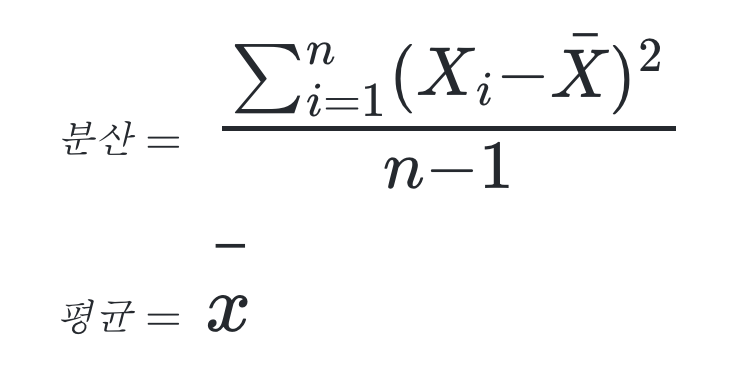

In [31]:
# 평균
fare_mean = df['fare'].values.mean()

# 분산
my_var = ((df['fare'].values - fare_mean) ** 2).sum() / (df['fare'].count() - 1)
my_var

np.float64(2469.436845743116)

In [30]:
df['fare'].var()

2469.436845743116

### std() - 표준편차

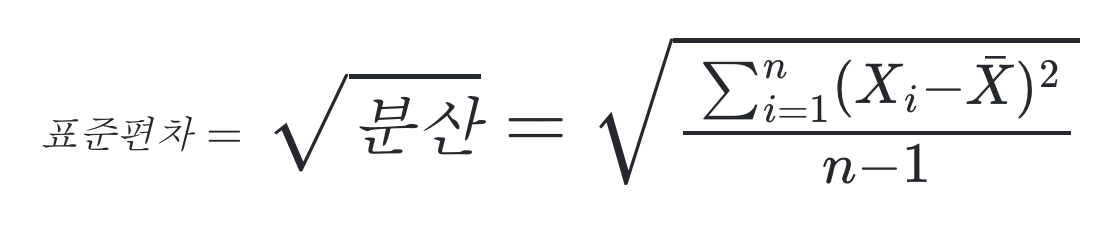

분산(var)의 제곱근

In [32]:
np.sqrt(df['fare'].var())

np.float64(49.6934285971809)

In [33]:
df['fare'].std()

49.6934285971809

### min() - 최소값, max() - 최대값

In [34]:
# 최소값
df['age'].min()

0.42

In [35]:
# 최대값
df['age'].max()

80.0

### agg - aggregation: 통합 통계 적용 (복수의 통계 함수 적용)

단일 컬럼에 agg 적용

In [36]:
df['age'].agg(['min', 'max', 'count', 'mean'])

min        0.420000
max       80.000000
count    714.000000
mean      29.699118
Name: age, dtype: float64

### 복수의 컬럼에 agg 적용

In [37]:
df[['age', 'fare']].agg(['min', 'max', 'count', 'mean'])

,age,fare
min,0.420000,0.000000
max,80.000000,512.329200
count,714.000000,891.000000
mean,29.699118,32.204208


### quantile() - 분위

Quantile이란 주어진 데이터를 동등한 크기로 분할하는 지점을 말합니다

10%의 경우 0.1을, 80%의 경우 0.8을 대입하여 값을 구합니다.

In [38]:
# 10% quantile
df['age'].quantile(0.1)

np.float64(14.0)

In [39]:
# 80% quantile
df['age'].quantile(0.8)

np.float64(41.0)

### unique() - 고유값, nunique() - 고유값 개수

고유값과 고유값의 개수를 구하고자 할 때 사용합니다.

unique()

In [40]:
df['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

nunique(): 고유값의 개수를 출력합니다.

In [41]:
df['who'].nunique()

3

### mode() - 최빈값

최빈값은 가장 많이 출현한 데이터를 의미합니다.

In [42]:
df['who'].mode()

0    man
Name: who, dtype: object

카테고리형 데이터에도 적용 가능합니다.

In [43]:
df['deck'].mode()

0    C
Name: deck, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

### corr() - 상관관계

corr()로 컬럼(column)별 상관관계를 확인할 수 있습니다.

- -1~1 사이의 범위를 가집니다.

- -1에 가까울 수록 반비례 관계, 1에 가까울수록 정비례 관계를 의미합니다.

In [45]:
df.corr(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


특정 컬럼에 대한 상관관계를 확인할 수 있습니다.

In [47]:
df.corr(numeric_only=True)['survived']

survived      1.000000
pclass       -0.338481
age          -0.077221
sibsp        -0.035322
parch         0.081629
fare          0.257307
adult_male   -0.557080
alone        -0.203367
Name: survived, dtype: float64

---

## 연습문제

다음 조건을 만족하는 승객의 나이 평균과 조건을 만족하는 데이터의 개수를 구하세요.

fare를 30 이상 40 미만 지불한 승객

pclass는 1등급

In [48]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


age 컬럼의 데이터 개수 구하기

In [49]:
condition1 = (df['fare'] >= 30) & (df['fare'] < 40)
condition2 = (df['pclass'] == 1)

df.loc[condition1 & condition2, 'age'].count()

np.int64(21)

age컬럼의 평균 구하기

In [50]:
df.loc[condition1 & condition2, 'age'].mean()

np.float64(44.095238095238095)

---

다이아몬드 데이터를 활용하여 다음의 문제를 풀어주세요

In [51]:
diamond = sns.load_dataset('diamonds')
diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


depth의 최소값을 구하세요

In [52]:
diamond['depth'].min()

43.0

carat에 대한 평균과 분산을 동시에 출력하세요

In [53]:
diamond['carat'].agg(['mean', 'var'])

mean    0.797940
var     0.224687
Name: carat, dtype: float64

x, y에 대한 합계와 표준편차를 출력하세요

In [54]:
diamond[['x', 'y']].agg(['sum', 'std'])

,x,y
sum,309138.620000,309320.330000
std,1.121761,1.142135


---

펭귄 데이터를 활용하여 다음의 문제를 풀어주세요

In [55]:
penguin = sns.load_dataset('penguins')
penguin

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


species 컬럼의 고유값을 출력해 주세요

In [56]:
penguin['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

island 컬럼의 최빈값을 출력해 주세요

In [57]:
penguin['species'].mode()

0    Adelie
Name: species, dtype: object

body_mass_g 컬럼의 10% 분위수 값(하위 10%)을 출력해 주세요

In [58]:
penguin['body_mass_g'].quantile(0.1)

np.float64(3300.0)

body_mass_g 컬럼의 80% 분위수 값(상위 20%)을 출력해 주세요

In [59]:
penguin['body_mass_g'].quantile(0.8)

np.float64(4950.0)